## James Schallert
## Machine Learning
## Assignment 6

## Logistic Regression

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
##Function to calculate hTheta = Sigmoid(coef*x)

def hTheta(x,coef):
    return 1/(1+math.exp(-np.matmul(np.transpose(coef),x)))

In [3]:
##Function to change a matrix of X into a matrix alpha of predictions

def calcAlpha(x,coef):
    alpha = np.zeros(np.size(x,0))
    for row in range(0,99):
        alpha[row] = hTheta(x[row],coef)
    return alpha

In [4]:
##Function to calculate the gradient of the objective function.
def calcGrad(alpha,x,y):
    return np.matmul(np.transpose(x),(alpha-y))

In [5]:
##Function to train the model using gradient descent.

def trainModelGD(x,y):
    iterations = 0
    learningRate = .01
    newCoef = np.zeros(np.size(x,axis=1))
    difference = 100
    
    while (difference > .01):
        coef = newCoef
        alpha = calcAlpha(x,coef)
        newCoef = coef - learningRate*calcGrad(alpha,x,y)
        iterations += 1
        difference = sum(abs(coef-newCoef))
    
    print("Gradient Descent Iterations:")
    print(iterations)
    print("Gradient Descent Coefficents [b , x1, x2]:")
    print(newCoef)
    return newCoef

In [6]:
##Function to calculate the hessian

def calcHessian(alpha,x):
    oneMinusAlpha = 1-alpha
    W = np.diag(oneMinusAlpha*alpha)
    partOne = np.matmul(np.transpose(-x),W)
    hessian = np.matmul(partOne,x)
    return hessian

In [7]:
##Function to train the model using Newton's Method

def trainModelNM(x,y):
    iterations = 0
    newCoef = np.zeros(np.size(x,axis=1))
    difference = 100
    
    while (difference > .01 and iterations<1000):
        coef = newCoef
        alpha = calcAlpha(x,coef)
        hessian = calcHessian(alpha,x)
        newCoef = coef + np.matmul(np.linalg.inv(hessian),calcGrad(alpha,x,y))
        iterations += 1
        difference = sum(abs(coef-newCoef))
    
    print("Newton's Method Iterations:")
    print(iterations)
    print("Newton's Method Coefficents [b , x1, x2]:")
    print(newCoef)
    
    return newCoef

In [8]:
##Function to label data based on probability.

def labelData(data):
    labeledData = np.copy(data)
    for row in range(data.size):
        if (data[row] <.5):
            labeledData[row] = 0
        else:
            labeledData[row] = 1
    return labeledData

In [9]:
##Function to plot probabilities of the data.

def probabilityPlot(modelData,y):
    tp = []
    fp = []
    tn = []
    fn = []
    advLabels = np.array(np.zeros(modelData.size))
    for row in range(modelData.size):
        if (modelData[row]<.5) & (y[row]<.5):
            tn = np.append(tn,modelData[row])
            advLabels[row] = 0
        elif (modelData[row]<.5) & (y[row]>.5):
            fn = np.append(fn,modelData[row])
            advLabels[row] = 1
        elif (modelData[row]>.5) & (y[row]>.5):
            tp = np.append(tp,modelData[row])
            advLabels[row] = 2
        else:
            fp = np.append(fp,modelData[row])
            advLabels[row] = 3
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(x)

    ax.scatter([i for i in range(len(tp))], tp,c='b', label='True Positive')
    ax.scatter([i for i in range(len(fp))], fp,c='k', label='False Positive')
    ax.scatter([i for i in range(len(tn))], tn,c='r', label='True Negative')
    ax.scatter([i for i in range(len(fn))], fn,c='y', label='False Negative')

    ax.set_title("Probabilities")
    ax.set_ylabel('Predicted Probability')
    ax.set_xlabel('Arbitrary')
    plt.legend();
    plt.axhline(.5, color='k')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    percentError = 100*(fp.size+fn.size)/(modelData.size)
    print('Percent error:')
    print(percentError)

In [10]:
##Function to create a scatter plot representing the data, their label,
##and the separating line of the model.

def lineAndScatterPlot(designMat,y,coef):
    tp = []
    fp = []
    tn = []
    fn = []
    
    separationLine = np.array([1,2,3,4,5,6,7,8,9,10],float)
    for i in range(separationLine.size):
        separationLine[i] = -(coef[0]+(coef[1]*separationLine[i])/coef[2])
    
    for row in range(np.size(designMat,axis=0)):
        if (designMat[row,3]<.5) & (y[row]<.5):
            tn = np.append(tn,designMat[row])
            tn = np.reshape(tn,(int(tn.size/4),4))
        elif (designMat[row,3]<.5) & (y[row]>.5):
            fn = np.append(fn,designMat[row])
            fn = np.reshape(fn,(int(fn.size/4),4))
        elif (designMat[row,3]>.5) & (y[row]>.5):
            tp = np.append(tp,designMat[row])
            tp = np.reshape(tp,(int(tp.size/4),4))
        else:
            fp = np.append(fp,designMat[row])
            fp = np.reshape(fp,(int(fp.size/4),4))
            
    fig, ax = plt.subplots()
    ax.scatter(tp[:,1], tp[:,2], c='b', label='True Positive',s=100)
    ax.scatter(fp[:,1], fp[:,2], c='k', label='False Positive',s=100)
    ax.scatter(tn[:,1], tn[:,2], c='r', label='True Negative',s=100)
    ax.scatter(fn[:,1], fn[:,2], c='y', label='False Negative',s=100)
    plt.plot(separationLine, label = 'Separating Line',c = 'k')
    plt.legend()
    ax.set_title("Data with Separating Line")
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    percentError = 100*(np.size(fp,axis=0)+np.size(fn,axis=0))/(np.size(designMat,axis=0))
    print('Percent error:')
    print(percentError)

In [11]:
##Get our design matrix X

with open('hw6x.dat') as f:
    x = []
    for line in f:
        temp = line.split()
        x.append([1,float(temp[0]),float(temp[1])])
    
x = np.reshape(x,(99,3))

In [12]:
##Get our label matrix Y

with open('hw6y.dat') as f:
    y = []
    for line in f:
        temp = line.split()
        y.append(float(temp[0]))
        
y = np.reshape(y,(99))

## Gradient Descent Method

In [13]:
GD_m = trainModelGD(x,y)
GD_modeledData = calcAlpha(x,GD_m)
GD_labeledData = labelData(GD_modeledData)
GD_megaList = np.concatenate((x,np.reshape(GD_modeledData,(99,1))),axis=1)


Gradient Descent Iterations:
169
Gradient Descent Coefficents [b , x1, x2]:
[-2.54244097  0.74712193  1.16613819]


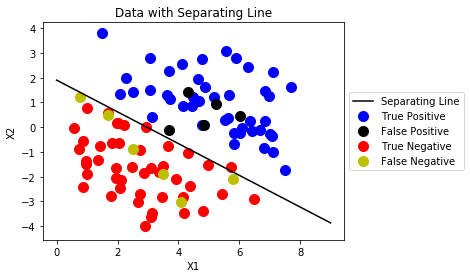

Percent error:
11.11111111111111


In [14]:
lineAndScatterPlot(GD_megaList,y,GD_m)

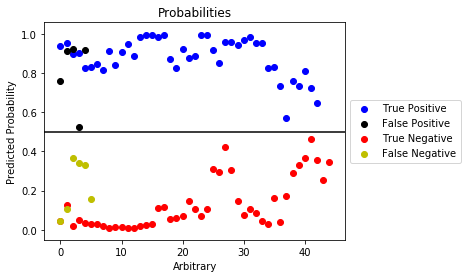

Percent error:
11.11111111111111


In [15]:
probabilityPlot(GD_modeledData,y)

## Newton's Method

In [16]:
NM_m = trainModelNM(x,y)
NM_modeledData = calcAlpha(x,NM_m)
NM_labeledData = labelData(NM_modeledData)
NM_megaList = np.concatenate((x,np.reshape(NM_modeledData,(99,1))),axis=1)

Newton's Method Iterations:
5
Newton's Method Coefficents [b , x1, x2]:
[-2.62050954  0.76037096  1.17194549]


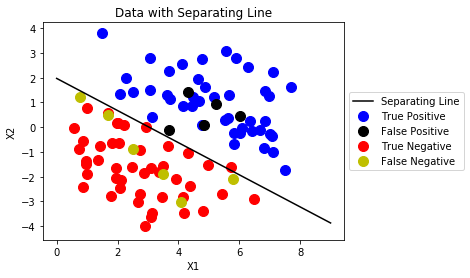

Percent error:
11.11111111111111


In [17]:
lineAndScatterPlot(NM_megaList,y,NM_m)

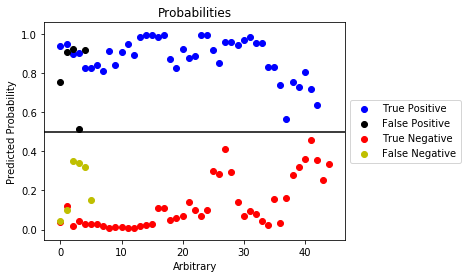

Percent error:
11.11111111111111


In [18]:
probabilityPlot(NM_modeledData,y)

In [ ]:
## Newton's method and Gradient Descent both ended up with the same
## %error of ~11%.  Their coefficients were very similar:

## GD = [-2.54244097  0.74712193  1.16613819]
## NM = [-2.62050954  0.76037096  1.17194549]

## However, because of our 'small' amount of data, Newton's method was
## MUCH faster, taking only 5 iterations versus gradient descent's 169.
## The costly part of Newton's method is calculating the inverse
## of the hessian, which becomes a problem with larger data sets.